In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

#color
EUCALYPTUS_GREEN = "#2E5E4E"


### Libraries
We import Python libraries for data analysis, visualization, and modeling:
- `pandas` & `numpy` for data manipulation and calculations  
- `seaborn` & `matplotlib` for visualizations  
- `scikit-learn` for building the logistic regression churn model


### Dataset Loading
We load the IBM Telco Customer Churn dataset, which contains subscription information for customers:
- Demographics (Gender, SeniorCitizen)
- Subscription details (Contract type, Tenure, Add-ons)
- Billing info (MonthlyCharges, TotalCharges)
- Churn flag (Yes/No)

This dataset allows us to analyze churn patterns and customer lifetime value.


In [55]:
import pandas as pd

file_path = '/content/drive/MyDrive/Portfolio/Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [56]:
df.shape
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### Data Cleaning
- Convert `TotalCharges` to numeric, as some entries may be stored as strings  
- Drop missing values to avoid errors in calculations  
- Encode `Churn` as binary (1 = Yes, 0 = No) for modeling and analysis


In [57]:
# convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# drop rows with missing TotalCharges
df = df.dropna(subset=["TotalCharges"])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [59]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
df["Churn"].value_counts(normalize=True)

,proportion
Churn,
0,0.734215
1,0.265785


### Customer Lifetime Value (CLV)
- CLV estimates total revenue from each customer: `CLV = MonthlyCharges × Tenure`  
- Helps quantify the potential revenue lost if a customer churns  
- Can be used to prioritize high-value customers for retention campaigns


In [60]:
df["CLV"] = df["MonthlyCharges"] * df["tenure"]

In [61]:
df["CLV"].describe()

,CLV
count,7032.000000
mean,2283.147248
std,2264.703327
min,18.800000
25%,397.800000
50%,1394.575000
75%,3791.250000
max,8550.000000


### Executive KPIs
Calculate key metrics that executives care about:
- Total number of customers  
- Overall churn rate  
- Average monthly charge  
- Average CLV per customer  
- Total historical revenue  

These KPIs provide a high-level view of the business and highlight potential risk areas.


In [62]:
kpis = {
    "Total Customers": df.shape[0],
    "Churn Rate": round(df["Churn"].mean(), 3),
    "Avg Monthly Charge": round(df["MonthlyCharges"].mean(), 2),
    "Avg CLV": round(df["CLV"].mean(), 2),
    "Total Historical Revenue": round(df["TotalCharges"].sum(), 2)
}

kpis

{'Total Customers': 7032,
 'Churn Rate': np.float64(0.266),
 'Avg Monthly Charge': np.float64(64.8),
 'Avg CLV': np.float64(2283.15),
 'Total Historical Revenue': np.float64(16056168.7)}

In [63]:
df.groupby("Contract")["Churn"].mean().sort_values(ascending=False)

,Churn
Contract,
Month-to-month,0.427097
One year,0.112772
Two year,0.028487


In [64]:
df.groupby("PaymentMethod")["Churn"].mean().sort_values(ascending=False)

,Churn
PaymentMethod,
Electronic check,0.452854
Mailed check,0.192020
Bank transfer (automatic),0.167315
Credit card (automatic),0.152531


In [65]:
addons = ["OnlineSecurity", "TechSupport", "DeviceProtection"]

for col in addons:
    print(col)
    print(df.groupby(col)["Churn"].mean())
    print()

OnlineSecurity
OnlineSecurity
No                     0.417787
No internet service    0.074342
Yes                    0.146402
Name: Churn, dtype: float64

TechSupport
TechSupport
No                     0.416475
No internet service    0.074342
Yes                    0.151961
Name: Churn, dtype: float64

DeviceProtection
DeviceProtection
No                     0.391403
No internet service    0.074342
Yes                    0.225393
Name: Churn, dtype: float64



In [66]:
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0–12", "12–24", "24–48", "48+"]
)

df.groupby("tenure_group")["Churn"].mean()

/tmp/ipython-input-2654623646.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_group")["Churn"].mean()


,Churn
tenure_group,
0–12,0.476782
12–24,0.287109
24–48,0.203890
48+,0.095132


In [67]:
#total lifetime revenue lost
revenue_at_risk = df[df["Churn"] == 1]["CLV"].sum()
revenue_at_risk

np.float64(2862576.9)

In [68]:
df["RiskSegment"] = "Low"

df.loc[
    (df["Contract"] == "Month-to-month") &
    (df["tenure"] < 12) &
    (df["MonthlyCharges"] > df["MonthlyCharges"].median()),
    "RiskSegment"
] = "High"

In [69]:
df["RiskSegment"].value_counts()

,count
RiskSegment,
Low,6262
High,770


### Customer Lifetime Value (CLV)
- CLV estimates total revenue from each customer: `CLV = MonthlyCharges × Tenure`  
- Helps quantify the potential revenue lost if a customer churns  
- Can be used to prioritize high-value customers for retention campaigns


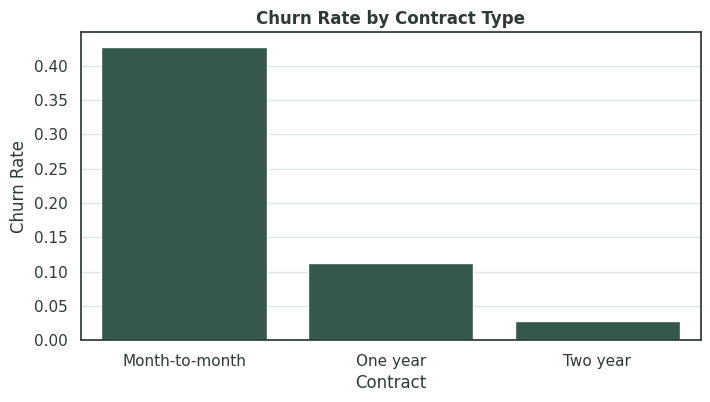

In [70]:
#churn by contract type
import seaborn as sns
import matplotlib.pyplot as plt

contract_churn = df.groupby("Contract", as_index=False)["Churn"].mean()

plt.figure(figsize=(8,4))
sns.barplot(
    data=contract_churn,
    x="Contract",
    y="Churn",
    color=EUCALYPTUS_GREEN
)

plt.ylabel("Churn Rate")
plt.title("Churn Rate by Contract Type")
plt.show()



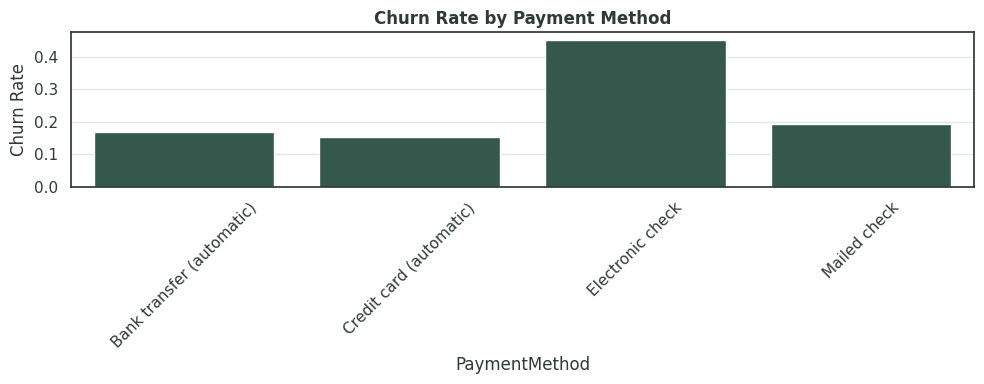

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

payment_churn = df.groupby("PaymentMethod", as_index=False)["Churn"].mean()


plt.figure(figsize=(10,4))
sns.barplot(
    data=payment_churn,
    x="PaymentMethod",
    y="Churn",
    color=EUCALYPTUS_GREEN
)

plt.ylabel("Churn Rate")
plt.title("Churn Rate by Payment Method")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("churn_by_payment.png", dpi=300)
plt.show()



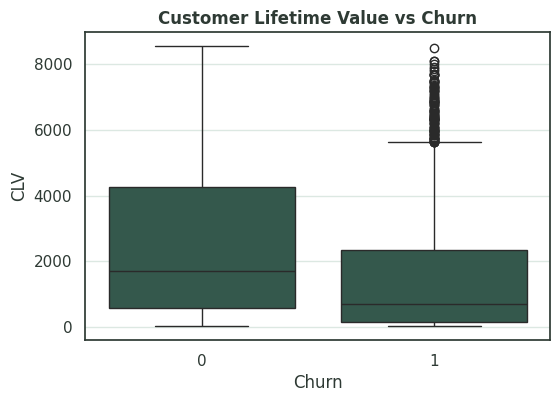

In [72]:
#clv distribution by churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="CLV", data=df, color=EUCALYPTUS_GREEN)
plt.title("Customer Lifetime Value vs Churn")
plt.savefig("clv_by_risk.png", dpi=300)
plt.show()


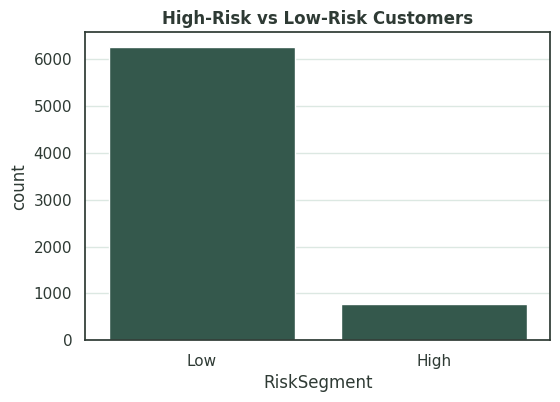

In [73]:
#risk segment counts
plt.figure(figsize=(6,4))
sns.countplot(x="RiskSegment", data=df, color=EUCALYPTUS_GREEN)
plt.title("High-Risk vs Low-Risk Customers")
plt.savefig("risk_segment_counts.png")
plt.show()

In [74]:
df["tenure_group_encoded"] = df["tenure_group"].cat.codes  # converts categories to 0,1,2,3
X = df.drop(columns=["customerID", "Churn", "CLV", "tenure_group"])
X["tenure_group"] = df["tenure_group_encoded"]


### Predictive Churn Model
- Use logistic regression to predict churn probability  
- All categorical variables are encoded using one-hot encoding to ensure the model works correctly  
- Train/test split ensures we can evaluate model performance on unseen data  
- Model evaluation metrics:
  - Classification report: precision, recall, f1-score  
  - ROC-AUC: overall predictive power  

Feature importance identifies which factors drive churn, helping business teams focus retention efforts.


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

#remove any manually created tenure_group column
if "tenure_group" in df.columns:
    df = df.drop(columns=["tenure_group"])

#prepare features and target
X = df.drop(columns=["customerID", "Churn", "CLV"])  # Drop target & ID
y = df["Churn"]

#encode all categorical/object columns ---
categorical_cols = X.select_dtypes(include="object").columns

#one-hot encoding, drop_first=True avoids multicollinearity
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

#train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

#fit logistic regression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

#predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

#evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {roc_auc:.3f}")

#feature importance
feature_importance = pd.DataFrame({
    "feature": X_encoded.columns,
    "coefficient": model.coef_[0]
}).sort_values(by="coefficient", ascending=False)

feature_importance.head(10)


Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


ROC-AUC Score: 0.832


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,feature,coefficient
11,InternetService_Fiber optic,0.429480
9,MultipleLines_No phone service,0.425426
27,PaperlessBilling_Yes,0.290141
0,SeniorCitizen,0.263681
29,PaymentMethod_Electronic check,0.257714
10,MultipleLines_Yes,0.169579
4,tenure_group_encoded,0.159409
24,StreamingMovies_Yes,0.141894
22,StreamingTV_Yes,0.131096
6,Partner_Yes,0.058919


### Revenue-at-Risk
- Calculate total CLV for customers who have already churned  
- Identifies revenue that is potentially lost  
- Segment high-risk customers based on:
  - Month-to-month contracts  
  - Short tenure (<12 months)  
  - Higher-than-average monthly charges  

High-risk segments allow prioritization for retention campaigns targeting high-value customers.


In [76]:
#revenue at risk (historical churn)
revenue_at_risk = df[df["Churn"] == 1]["CLV"].sum()
print(f"Revenue at Risk (Historical): ${revenue_at_risk:,.2f}")


Revenue at Risk (Historical): $2,862,576.90


In [77]:
df["RiskSegment"] = "Low"

df.loc[
    ((df["Contract"] == "Month-to-month") & (df["tenure"] < 12)) |
    ((df["Contract"] == "Month-to-month") & (df["MonthlyCharges"] > df["MonthlyCharges"].median())) |
    ((df["tenure"] < 12) & (df["MonthlyCharges"] > df["MonthlyCharges"].median())),
    "RiskSegment"
] = "High"

#check counts
df["RiskSegment"].value_counts()


,count
RiskSegment,
Low,3842
High,3190


In [78]:
high_risk_revenue = df[df["RiskSegment"] == "High"]["CLV"].sum()
print(f"Revenue at Risk (High-Risk Segment): ${high_risk_revenue:,.2f}")

Revenue at Risk (High-Risk Segment): $4,425,441.15


In [79]:
high_risk_revenue = df[df["RiskSegment"] == "High"]["CLV"].sum()
print(f"Revenue at Risk (High-Risk Segment): ${high_risk_revenue:,.2f}")

Revenue at Risk (High-Risk Segment): $4,425,441.15


### Recommendations
Based on analysis and model insights:
- Encourage month-to-month customers to upgrade to long-term contracts  
- Bundle add-ons to increase retention  
- Target high-CLV, high-risk customers with personalized offers  
- Optimize payment experience to reduce churn


### Takeaway
- Identified top churn drivers (contract type, payment method, add-ons)  
- Calculated Customer Lifetime Value and revenue at risk  
- Built predictive model for churn with logistic regression  
- Provided actionable insights and recommendations for retention campaigns  

This notebook demonstrates end-to-end subscription commerce analytics using real customer data.


In [81]:
plot_files = [
    "churn_by_contract.png",
    "churn_by_payment.png",
    "clv_by_risk.png",
    "risk_segment_counts.png"
]

from google.colab import files

for file in plot_files:
    files.download(file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>